In [ ]:
import tensorflow as tf
# keras 사용 위해 tensorflow import

# mnist 데이터 로드
(X_train_f, y_train_f), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# mnist 형태 확인
print(X_train_f.shape, X_test.shape)
print(y_train_f.shape, y_test.shape)

# 검증 세트 추가
X_train, y_train = X_train_f[:50000], y_train_f[:50000]
X_valid, y_valid = X_train_f[50000:], y_train_f[50000:]

X_train = X_train/255.0
X_valid = X_valid/255.0
X_test = X_test / 255.0

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)
(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)


In [ ]:
# Sequential 모델 사용
from keras.models import Sequential
from keras.layers import Dense

tf.random.set_seed(23)
model = Sequential(
    [
        tf.keras.layers.Input(shape=[28,28]),
        tf.keras.layers.Flatten(),
        Dense(100, activation="relu", name="layer1"), # relu
        Dense(50, activation="relu", name="layer2"), # 0보다 크면 입력값과 동일한 출력값 출력
        Dense(10, activation="softmax", name="layer3")
        # 뉴런 10개를 가진 Dense 출력 층
    ]
)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer1 (Dense)                       │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer2 (Dense)                       │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer3 (Dense)                       │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 84,060 (328.36 KB)

 Trainable params: 84,060 (328.36 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6356 - loss: 1.2418 - val_accuracy: 0.9060 - val_loss: 0.3375
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9035 - loss: 0.3391 - val_accuracy: 0.9236 - val_loss: 0.2672
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9217 - loss: 0.2713 - val_accuracy: 0.9345 - val_loss: 0.2321
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9330 - loss: 0.2330 - val_accuracy: 0.9415 - val_loss: 0.2064
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9407 - loss: 0.2047 - val_accuracy: 0.9472 - val_loss: 0.1870
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9468 - loss: 0.1826 - val_accuracy: 0.9520 - val_loss: 0.1716
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9517 - loss: 0.1647 - val_accuracy: 0.9555 - val_loss: 0.1592
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9575 - loss: 0.1499 -

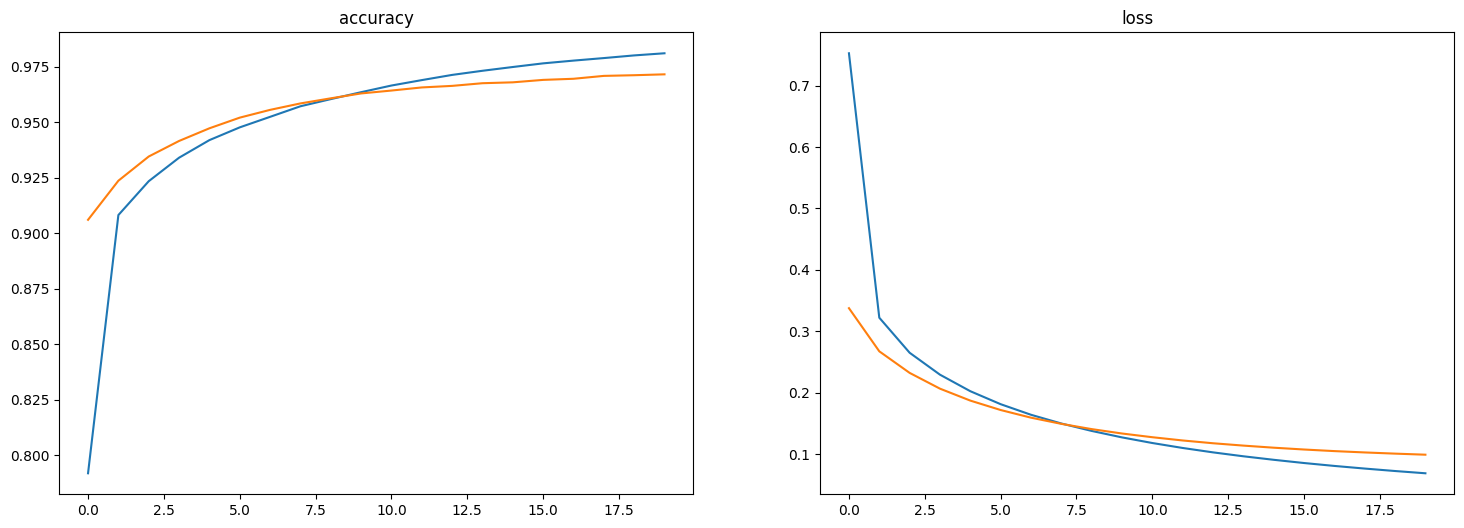

In [ ]:
# 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))

# 정확도
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.title("accuracy")

# 손실률
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("loss")

plt.show()

 위 그래프를 통해 훈련하는 동안 훈련 정확도와 검증 정확도가 꾸준히 상승하는 것을 볼 수 있다.

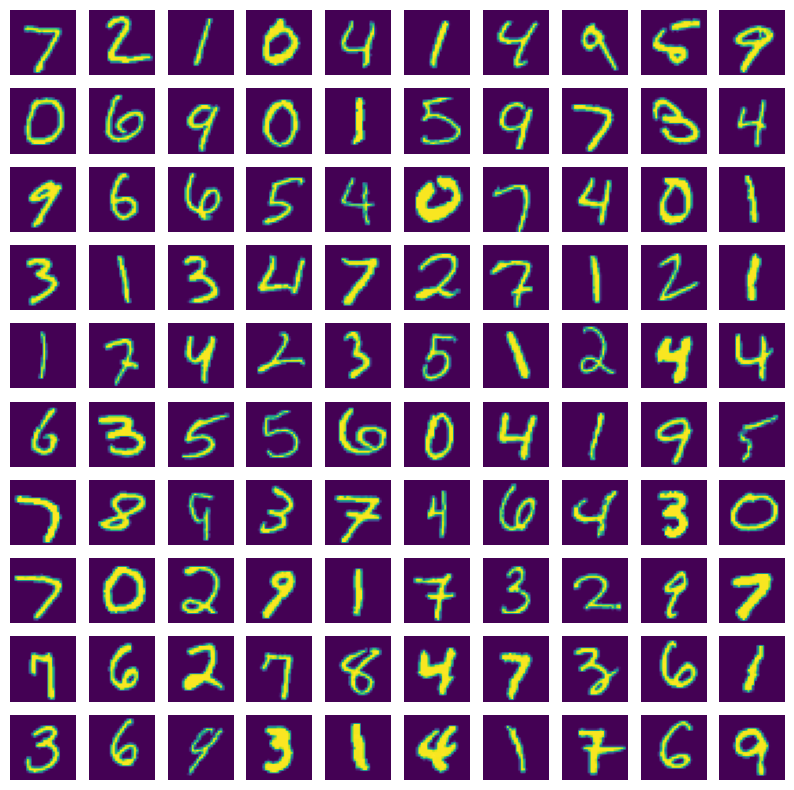

In [ ]:
plt.figure(figsize=(10,10))


for i in range(100):
  plt.subplot(10,10,i+1)
  image = X_test[i].reshape(28,28)
  plt.imshow(image)
  plt.axis("off")

In [ ]:
import numpy as np
# 샘플 0 ~ 9
test = [3,2,1,18,4,15,11,0,61,7]

X_new = X_test[test]

y_proba = model.predict(X_new)
y_pred = y_proba.argmax(axis=-1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# 테스트 세트를 이용한 정확도 측정
result = model.evaluate(X_test,y_test)
result

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9684 - loss: 0.1107


[0.09608972072601318, 0.9715999960899353]

In [ ]:
print("최종 예측 성공률(%) : ",result[1]*100)
print("손실률 :", result[0])

최종 예측 성공률(%) :  97.15999960899353
손실률 : 0.09608972072601318
